#  Covid-19 in Northern Ireland

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
!pip install -qq geopandas

In [3]:
import geopandas
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import warnings

from matplotlib import rcParams

warnings.filterwarnings("ignore")
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

rcParams['figure.figsize'] = (18, 6)
rcParams['figure.autolayout'] = True

map = 'http://geoportal1-ons.opendata.arcgis.com/datasets/3a4fa2ce68f642e399b4de07643eeed3_0.geojson?outSR={%22latestWkid%22:27700,%22wkid%22:27700}'
gdf = geopandas.read_file(map)
gdf = gdf[gdf['lad19cd'].str.contains('N')].rename(columns={'lad19cd': 'LTLA'})

In [4]:
# population data (Mid-2020 estimates from https://www.ons.gov.uk/peoplepopulationandcommunity)
population = pd.DataFrame(
    {'LTLA':['N09000001', 'N09000002', 'N09000003', 'N09000004', 'N09000005', 'N09000006', 'N09000007', 'N09000008', 'N09000009', 'N09000010', 'N09000011'],
     'count':[143756, 217232, 342560, 144943, 151109, 117337, 146452, 139443, 148953, 181669, 162056]}
)
population_array = population.set_index('LTLA').sort_values(['LTLA'])
population_array

count
LTLA             
N09000001  143756
N09000002  217232
N09000003  342560
N09000004  144943
N09000005  151109
N09000006  117337
N09000007  146452
N09000008  139443
N09000009  148953
N09000010  181669
N09000011  162056

In [5]:
# build contact matrix
mobility = pd.read_csv('https://gitlab.com/chicas-covid19/covid19uk/-/raw/master/data/mergedflows.csv')
mobility = mobility[mobility['From'].str.contains('N') & mobility['To'].str.contains('N')]
mobility = mobility.sort_values(['From', 'To']).groupby(['From', 'To']).agg({'Flow': sum}).reset_index()
contact_matrix = mobility.pivot(index='To', columns='From', values='Flow').fillna(0)
contact_matrix

From       N09000001  N09000002  N09000003  N09000004  N09000005  N09000006  \
To                                                                            
N09000001      23787       1493       5920       1231        197        187   
N09000002        472      44373       1003        172        108        364   
N09000003      19001       7791      75031       2055        788        848   
N09000004        288        111        210      28720       1577        400   
N09000005         94         47        157       3720      34352       1362   
N09000006         35        199        146        481       2263      26956   
N09000007       2428       5482       9290        343        124        159   
N09000008       4100        579       1196       3490        130         78   
N09000009        642       2523        295       1438        707       1892   
N09000010        370       4271        706         45         38         73   
N09000011        783        475       2379         93         31         43   

From       N09000007  N09000008  N09000009  N09000010  N09000011  
To                                                                
N09000001       3430       8420       1717        866       1812  
N09000002       2352        467       2750       3014        459  
N09000003      32857      10006       2713       7218      19221  
N09000004        111       1056       1459         42         65  
N09000005         99         99       1125         38         48  
N09000006         70         32       1731         49         29  
N09000007      25799       1182        438       3045       5706  
N09000008        634      26311       1135        405        479  
N09000009        333        545      28640        217        101  
N09000010       1234        341        183      33378        903  
N09000011       2011        397         77       1054      27033

date       2021-06-01  2021-06-02  2021-06-03  2021-06-04  2021-06-05  \
LTLA                                                                    
N09000001           2           7           3           2           3   
N09000002           9           7           7           8          14   
N09000003          15          16          10          19          14   
N09000004           7           7           8           6           7   
N09000005           8          16          16          17          15   
N09000006           1           4           5           1           1   
N09000007           2           4           1           4           3   
N09000008           5           9           3           3           1   
N09000009           9          10          12           6           4   
N09000010          11           6          16          13          12   
N09000011           1           2           4           1           4   

date       2021-06-06  2021-06-07  2021-06-08  2021-06-09  2021-06-10  ...  \
LTLA                                                                   ...   
N09000001           6          10           7           3           8  ...   
N09000002           2           9          16          13           4  ...   
N09000003          12          18          10          17          30  ...   
N09000004           2           5          11           6           7  ...   
N09000005           9           9          17          18          25  ...   
N09000006           2           4          11           4           7  ...   
N09000007           3           2           1           6           4  ...   
N09000008           2           2           5           5          12  ...   
N09000009           0           7           6           8           8  ...   
N09000010           8          13          17          10           4  ...   
N09000011           1           3           1           5          11  ...   

date       2021-07-22  2021-07-23  2021-07-24  2021-07-25  2021-07-26  \
LTLA                                                                    
N09000001          89         101          68          66         104   
N09000002         107          76          88          76         118   
N09000003         344         328         265         287         330   
N09000004         128          84          90          87          81   
N09000005         121         138          82          77         120   
N09000006          55          44          50          45          45   
N09000007          80          93          83          77          94   
N09000008         102          68          67          53          76   
N09000009         115         121          95          80         138   
N09000010         135         140         112         125         135   
N09000011          86          79          84          73          84   

date       2021-07-27  2021-07-28  2021-07-29  2021-07-30  2021-07-31  
LTLA                                                                   
N09000001         112         112          75          85          65  
N09000002         122         134         129          93          98  
N09000003         385         326         272         242         167  
N09000004         102          79          92          98          74  
N09000005         149         108         139          79          92  
N09000006          53          57          74          61          58  
N09000007          85          77          78          63          68  
N09000008         104          87          59          53          40  
N09000009         127         107          96         100          79  
N09000010         147         153         108         126          87  
N09000011          77          84          97          57          53  

[11 rows x 61 columns]

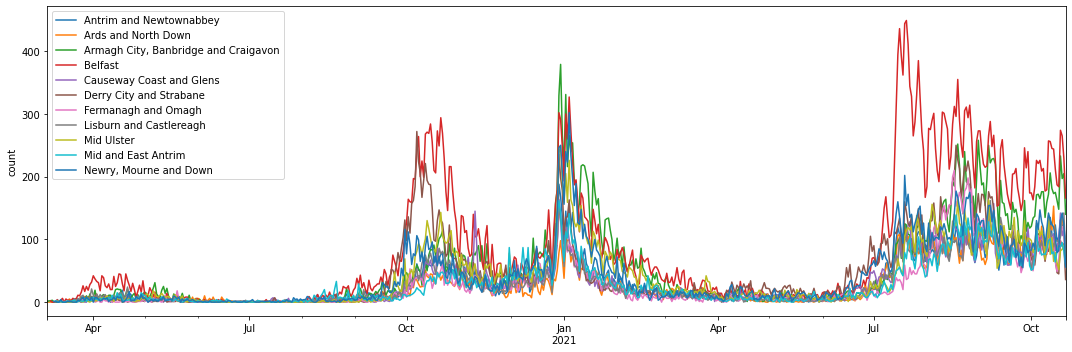

In [6]:
# prepare Covid-19 case data
date_range = ['2021-06-01', '2021-08-01']

cases = pd.read_csv('https://api.coronavirus.data.gov.uk/v2/data?areaType=ltla&metric=newCasesBySpecimenDate&format=csv&release=2021-10-24')
cases['date'] = pd.to_datetime(cases['date'])
cases = cases[cases['areaCode'].str.contains('N')].rename(columns={'areaCode':'LTLA', 'newCasesBySpecimenDate':'count'}).sort_values(['date','LTLA'])
_ = cases.set_index('date').groupby('areaName')['count'].plot(xlabel='', ylabel='count', figsize=(15,5), legend=True)

# subset data
cases = cases.loc[(cases['date']>=date_range[0]) & (cases['date']<date_range[1])].reset_index(drop=True)
case_matrix = cases.pivot(index='LTLA', columns='date', values='count').fillna(0)
case_matrix

In [7]:
# inputs forNorthern GEM model

popsize = np.array(population_array, dtype=np.float32).squeeze()

C = np.array(contact_matrix, dtype=np.float32)

data =  np.array(case_matrix, dtype=np.float32)

s_init = popsize - 10
e_init = np.zeros_like(popsize)
i_init = np.ones_like(popsize) * 10
r_init = np.zeros_like(popsize)

In [8]:
from gem import GEM

prog = """
C = Matrix()
s_init = Vector()
e_init = Vector()
i_init = Vector()
r_init = Vector()
popsize = Vector()

beta ~ Gamma(2.0, 10.0)
phi ~ Gamma(2.0, 4.0)
nu = 0.5                # 2-day latent period
gamma ~ Gamma(2.0, 8.0) # 4-day average infectious period

Epidemic MyEpidemic() {

    S = State(init=s_init)
    E = State(init=e_init)
    I = State(init=i_init)
    R = State(init=r_init)
    
    [S -> E] = beta * (I + phi * matvec(C, (I / popsize))) / popsize
    [E -> I] = nu
    [I -> R] = gamma
}
epi ~ MyEpidemic()
"""

In [9]:
# instantiate model

model = GEM(prog, 
            const_data={'C': C,
                        's_init': s_init,
                        'e_init': e_init,
                        'i_init': i_init,
                        'r_init': r_init,
                        'popsize': popsize
                        }
            )

#print(model.pyprog)

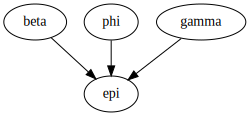

In [10]:
from gem.gemlang.dag import DAG

DAG(model.ast).dot()

In [11]:
sim = model.sample(1, condition_vars={'beta':0.43, 'phi':0.33, 'gamma':0.05})

In [12]:
# from gem.plotting import plot_state_timeseries
# plot states summing over each meta population
# plot_state_timeseries(model['epi'], sim.epi, state_labels=('S', 'E', 'I', 'R'))

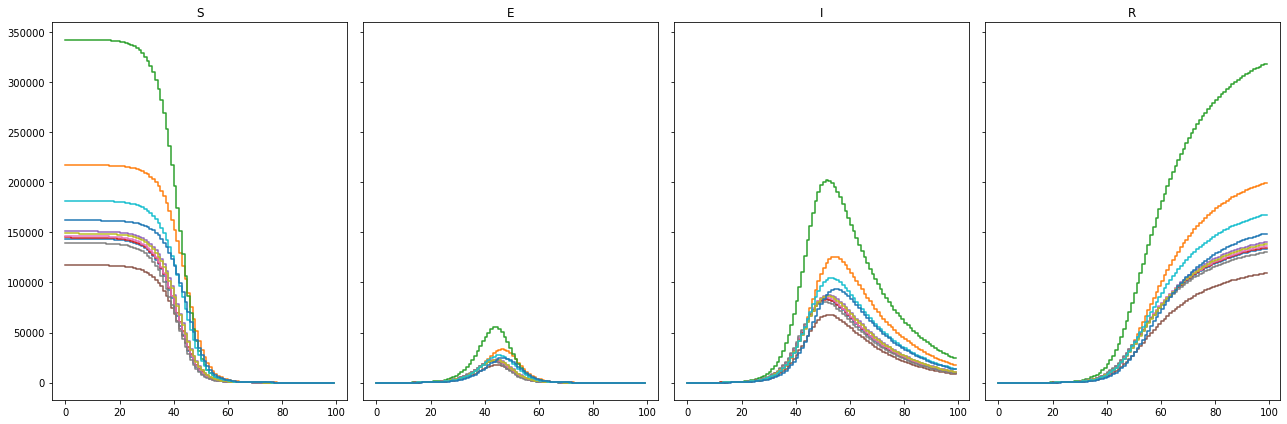

In [13]:
from gemlib.util import compute_state

state_labels = ['S', 'E', 'I', 'R']
state_timeseries = compute_state(model['epi'].initial_state, 
                                 sim.epi, 
                                 model['epi'].stoichiometry)

fig, ax = plt.subplots(nrows=1, ncols=len(state_labels), sharey=True)
x = np.tile(
        np.arange(state_timeseries.shape[-2]), (state_timeseries.shape[-3], 1)
    )

for i in np.arange(len(state_labels)):
    y = state_timeseries[...,i].numpy()
    _ = ax[i].step(x.T, y.T)
    ax[i].set_title(state_labels[i])

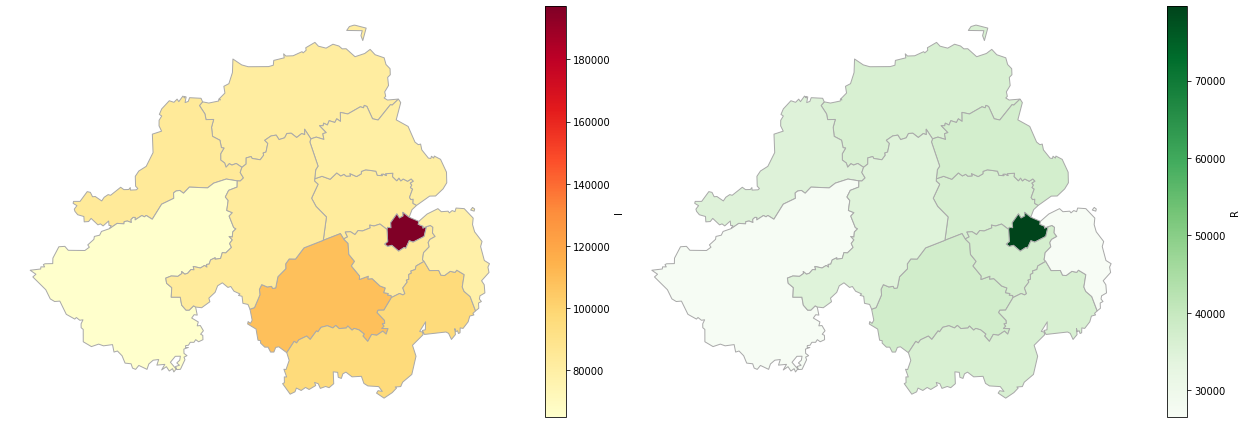

In [14]:
spatial_labels = pd.DataFrame(population_array.index)
state_labels_ = list(''.join(state_labels))

time_slice_df = pd.DataFrame(state_timeseries[:,50,:].numpy(), columns=list(state_labels_))
time_slice_df = spatial_labels.join(time_slice_df)

gdf = gdf.merge(time_slice_df, on='LTLA')

fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True)
_ = gdf.plot(ax=ax[0], column='I', legend=True, legend_kwds={'label':'I'}, cmap='YlOrRd', edgecolor='#aaa', figsize=(8,4)).set_axis_off()
_ = gdf.plot(ax=ax[1], column='R', legend=True, legend_kwds={'label':'R'}, cmap='Greens', edgecolor='#aaa', figsize=(8,4)).set_axis_off()


# Inference

In [24]:
posterior, accept = model.fit(observed={'epi': sim.epi},
                              n_samples=10000, 
                              num_burnin_steps=5000, 
                              init={'beta':0.4, 'phi':0.3, 'gamma':0.045})

Sampling...
Done in 52.407157383000595 seconds


In [25]:
a = accept.inner_results.is_accepted.numpy()

print('acceptance ratio:', sum(a)/a.size)

acceptance ratio: 0.8321


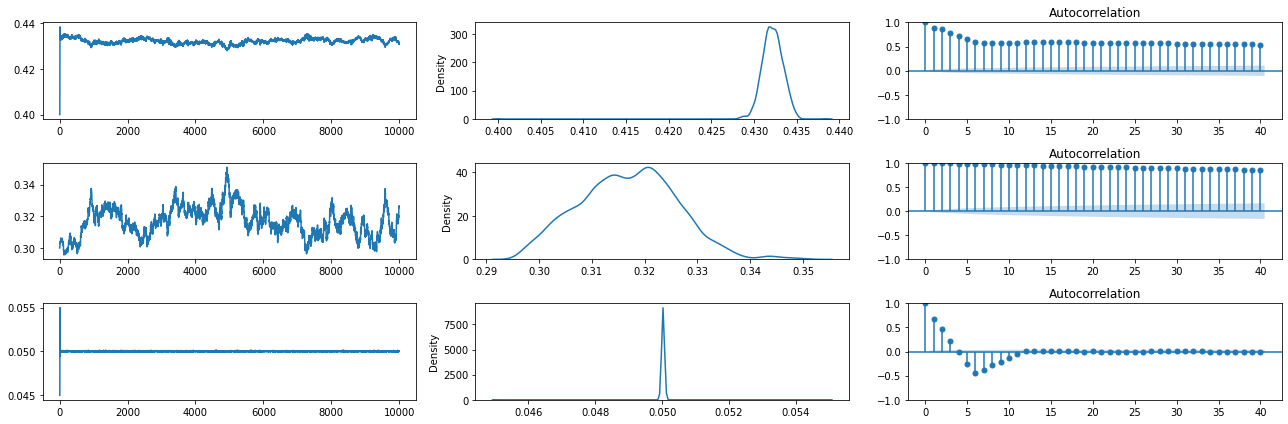

In [26]:
from gem.plotting import traceplot

_ = traceplot(posterior)